# Lending Club Case Study

### This case study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

### To analyse this we have the complete loan data for all loans issued through the time period 2007 to 2011 and its Data Dictionary. 

## 1. Importing required libraries

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Extracting data from excel & csv

In [182]:
DataDict = pd.read_excel("Data_Dictionary.xlsx")

In [183]:
LoanDf = pd.read_csv("loan.csv", low_memory=False)

In [184]:
LoanDf.shape

(39717, 111)

In [185]:
LoanDf.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Displaying the first few entries

In [186]:
LoanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 3. Data cleaning

## Droping columns with null values:

### List of columns with all null values

In [187]:
df = LoanDf.isna().sum()==LoanDf.shape[0]
df[((LoanDf.isna().sum()==LoanDf.shape[0])==True)]

mths_since_last_major_derog       True
annual_inc_joint                  True
dti_joint                         True
verification_status_joint         True
tot_coll_amt                      True
tot_cur_bal                       True
open_acc_6m                       True
open_il_6m                        True
open_il_12m                       True
open_il_24m                       True
mths_since_rcnt_il                True
total_bal_il                      True
il_util                           True
open_rv_12m                       True
open_rv_24m                       True
max_bal_bc                        True
all_util                          True
total_rev_hi_lim                  True
inq_fi                            True
total_cu_tl                       True
inq_last_12m                      True
acc_open_past_24mths              True
avg_cur_bal                       True
bc_open_to_buy                    True
bc_util                           True
mo_sin_old_il_acct       

### Dropping all those columns since we don't have any values in it

In [188]:
LoanDf.drop(df[((LoanDf.isna().sum()==LoanDf.shape[0])==True)].index,axis=1,inplace=True)

### Find the percentage of null values in each column

In [189]:
(LoanDf.isna().sum()/LoanDf.shape[0]*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Greater that 50% null values

In [190]:
GTFiftyDf = (LoanDf.isna().sum()/LoanDf.shape[0]*100)[((LoanDf.isna().sum()/LoanDf.shape[0]*100)>50)]
GTFiftyDf

mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64

In [191]:
DataDict[DataDict["LoanStatNew"].isin(GTFiftyDf.index)]

,LoanStatNew,Description
50,mths_since_last_delinq,The number of months since the borrower's last...
52,mths_since_last_record,The number of months since the last public rec...
58,next_pymnt_d,Next scheduled payment date


### Next payment due is something that we could remove from the data set since the we have very few data and also this will not be a key factor is identifing defaulters

In [192]:
LoanDf.drop(["next_pymnt_d"],axis=1,inplace=True)

In [193]:
LoanDf.shape

(39717, 56)

## Next step is to clean the value in each column

In [194]:
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Column 'term'

In [195]:
LoanDf["term"] = LoanDf.term.apply(lambda x: x.rstrip("months")).astype("int")

In [196]:
LoanDf["term"]

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

### Column 'int_rate'

In [197]:
LoanDf["int_rate"] = LoanDf.int_rate.apply(lambda x: x.rstrip("%")).astype("float")

In [198]:
LoanDf["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

### Column 'emp_length'

In [271]:
LoanDf["emp_length"]

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [282]:
LoanDf["emp_length"].unique()

array(['10 years', '0 years', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [273]:
LoanDf["emp_length"].isnull().sum()

1075

### Here we are replacing all 10+ years with 10 years and < 1 years with 0 years, so that we can use this for calculations

In [280]:
LoanDf["emp_length"] = LoanDf["emp_length"].apply(lambda x: "0 years" if x == "< 1 year" else ("10 years" if x == "10+ years" else x ))

In [286]:
LoanDf["emp_length"].mode()

0    10 years
Name: emp_length, dtype: object

### The missing values are filled with 10 years since the value is the most repetetive one in the data set.

In [287]:
LoanDf["emp_length"].fillna("10 years",inplace=True)

In [289]:
LoanDf["emp_length"].apply(lambda x : x.rstrip("years")).astype("int")

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39717, dtype: int64

### Colum 'emp_title' filling missing value with 'No Title provided'

In [298]:
LoanDf["emp_title"]

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

###  filling missing value with 'No Title provided'
> The missing values could be a data entry issue or customer who default may not have a job tile or provide one.
By providing this default value we could identify this while analysis

In [299]:
LoanDf["emp_title"].fillna("No Title provided",inplace=True)

### Column 'title'

In [293]:
LoanDf["title"]

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object

In [294]:
LoanDf["title"].isnull().sum()

11

In [295]:
LoanDf["title"].mode()

0    Debt Consolidation
Name: title, dtype: object

### Since the number of missing values are less, we will replace the title with most repeated one

In [300]:
LoanDf["title"].fillna("Debt Consolidation",inplace=True)

### Column 'issue_d' spliting to month and year

In [199]:
LoanDf["issue_d"] = pd.to_datetime(LoanDf["issue_d"],format="%b-%y")

In [200]:
LoanDf["issue_m"] = LoanDf['issue_d'].dt.month_name().str[:3]

In [201]:
LoanDf["issue_y"] = pd.DatetimeIndex(LoanDf["issue_d"]).year

In [202]:
LoanDf[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,Dec,2011
1,2011-12-01,Dec,2011
2,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
4,2011-12-01,Dec,2011


### Column 'pymnt_plan' has only value 'n' hence this could be dropped

In [203]:
LoanDf["pymnt_plan"].unique()

array(['n'], dtype=object)

In [204]:
LoanDf.drop(["pymnt_plan"],axis=1,inplace=True)

### Column 'url' could be dropped as this doesn't have any relevant information for the analysis

In [205]:
LoanDf["url"]

0        https://lendingclub.com/browse/loanDetail.acti...
1        https://lendingclub.com/browse/loanDetail.acti...
2        https://lendingclub.com/browse/loanDetail.acti...
3        https://lendingclub.com/browse/loanDetail.acti...
4        https://lendingclub.com/browse/loanDetail.acti...
                               ...                        
39712    https://lendingclub.com/browse/loanDetail.acti...
39713    https://lendingclub.com/browse/loanDetail.acti...
39714    https://lendingclub.com/browse/loanDetail.acti...
39715    https://lendingclub.com/browse/loanDetail.acti...
39716    https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 39717, dtype: object

In [206]:
LoanDf.drop(["url"],axis=1,inplace=True)

### Column 'earliest_cr_line' spliting into month and year

In [207]:
LoanDf["earliest_cr_line"] = pd.to_datetime(LoanDf["earliest_cr_line"],format="%b-%y")
LoanDf["earliest_cr_line_m"] = LoanDf['earliest_cr_line'].dt.month_name().str[:3]
LoanDf["earliest_cr_line_y"] = pd.DatetimeIndex(LoanDf["earliest_cr_line"]).year

In [208]:
LoanDf[["earliest_cr_line","earliest_cr_line_m","earliest_cr_line_y"]].head()

,earliest_cr_line,earliest_cr_line_m,earliest_cr_line_y
0,1985-01-01,Jan,1985
1,1999-04-01,Apr,1999
2,2001-11-01,Nov,2001
3,1996-02-01,Feb,1996
4,1996-01-01,Jan,1996


### Column 'mths_since_last_delinq' setting the null values as 0, assuming that LC would have the data collected if customer is delinquent
> In special sceanrios (contrary to the assumption) we will handle it seperately

/Users/I320866/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mths_since_last_delinq'>

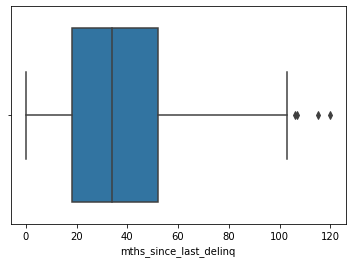

In [209]:
sns.boxplot(LoanDf["mths_since_last_delinq"])

<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Count'>

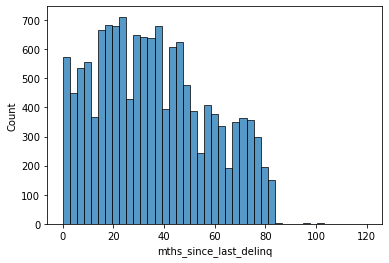

In [210]:
sns.histplot(LoanDf["mths_since_last_delinq"])

In [211]:
LoanDf["mths_since_last_delinq"].median()

34.0

In [212]:
##LoanDf.mths_since_last_delinq.fillna(34,inplace=True)

### Setting the missing value to zero or median will change the distribution a lot hence will leave as it is

### Column 'mths_since_last_record'

/Users/I320866/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mths_since_last_record'>

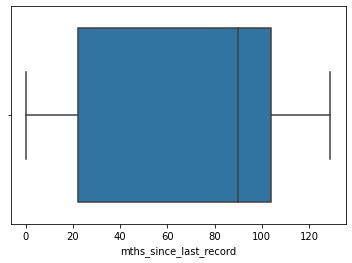

In [213]:
sns.boxplot(LoanDf["mths_since_last_record"])

<AxesSubplot:xlabel='mths_since_last_record', ylabel='Count'>

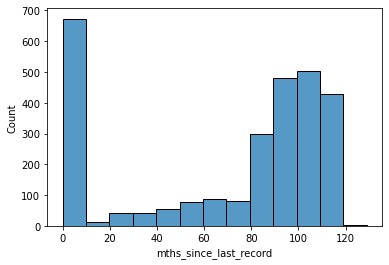

In [214]:
sns.histplot(LoanDf["mths_since_last_record"])

### Setting the missing value to zero or median will change the distribution a lot hence will leave as it is


In [215]:
## LoanDf.mths_since_last_record.fillna(0,inplace=True)

### Column 'revol_util' removing the % and replacing the null values

In [216]:
LoanDf['revol_util'] = LoanDf['revol_util'].astype(str).str.rstrip('%').astype("float")

In [217]:
LoanDf['revol_util'].isnull().sum()

50

/Users/I320866/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revol_util'>

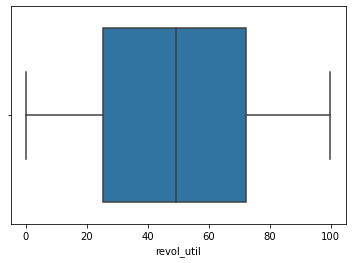

In [218]:
sns.boxplot(LoanDf["revol_util"])

In [219]:
LoanDf['revol_util'].median()

49.3

### replacing the null values with median since distribution is even and the mean and median is almost the same

In [220]:
LoanDf['revol_util'].fillna(49.3,inplace=True)

### Column 'initial_list_status'

In [221]:
LoanDf["initial_list_status"]
## What is w & f ?

0        f
1        f
2        f
3        f
4        f
        ..
39712    f
39713    f
39714    f
39715    f
39716    f
Name: initial_list_status, Length: 39717, dtype: object

### Column 'total_pymnt' rounding off to 2 decimals

In [222]:
LoanDf["total_pymnt"] = LoanDf["total_pymnt"].round(2)

### Column 'total_pymnt_inv' rounding off to 2 decimals

In [223]:
LoanDf["total_pymnt_inv"] = LoanDf["total_pymnt_inv"].round(2)

### Column 'last_pymnt_d' spliting into month and year

In [224]:
LoanDf["last_pymnt_d"]

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [225]:
LoanDf["last_pymnt_d"].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [226]:
LoanDf[LoanDf["last_pymnt_d"].isnull()]["issue_y"].unique()

array([2011, 2010, 2009, 2008])

In [227]:
LoanDf[LoanDf["last_pymnt_d"].isnull()]["loan_status"].unique()

array(['Charged Off'], dtype=object)

In [228]:
LoanDf["last_pymnt_d"].fillna('Dec-99',inplace=True)

In [229]:
LoanDf["last_pymnt_d"].isnull().sum()

0

### We have replaced the null value with Dec-99.
> The loan status for all these entries are charged off and the loan issue dates are b/w 2008 - 2011 with a term or 36 or 60 months, hence determining a date based on mode would impact the data hence leaving the null values as Dec-99 which we can distinguish during analysis.

In [230]:
LoanDf["last_pymnt_d"] = pd.to_datetime(LoanDf["last_pymnt_d"],format="%b-%y")
LoanDf["last_pymnt_m"] = LoanDf['last_pymnt_d'].dt.month_name().str[:3]
LoanDf["last_pymnt_y"] = pd.DatetimeIndex(LoanDf["last_pymnt_d"]).year

In [231]:
LoanDf[["last_pymnt_d","last_pymnt_m","last_pymnt_y"]].head()

,last_pymnt_d,last_pymnt_m,last_pymnt_y
0,2015-01-01,Jan,2015
1,2013-04-01,Apr,2013
2,2014-06-01,Jun,2014
3,2015-01-01,Jan,2015
4,2016-05-01,May,2016


### Column 'last_credit_pull_d' spliting to month and year

In [123]:
LoanDf["last_credit_pull_d"]

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

In [232]:
LoanDf["last_credit_pull_d"].isnull().sum()

2

In [233]:
LoanDf["last_credit_pull_d"].mode()

0    May-16
Name: last_credit_pull_d, dtype: object

In [237]:
LoanDf[LoanDf["last_credit_pull_d"].isnull()][["issue_d","loan_status"]]

,issue_d,loan_status
26025,2010-09-01,Charged Off
39476,2007-12-01,Fully Paid


In [243]:
LoanDf[LoanDf["loan_status"] == "Charged Off"]["last_credit_pull_d"].mode()

0    May-16
Name: last_credit_pull_d, dtype: object

In [247]:
LoanDf[LoanDf["loan_status"] == "Fully Paid"]["last_credit_pull_d"].mode()

0    May-16
Name: last_credit_pull_d, dtype: object

### Replacing the missing value with 'May-16' since the most number of credit pull accross the different loan status is May-16

In [248]:
LoanDf["last_credit_pull_d"].fillna('May-16',inplace=True)

In [249]:
LoanDf["last_credit_pull_d"] = pd.to_datetime(LoanDf["last_credit_pull_d"],format="%b-%y")
LoanDf["last_credit_pull_m"] = LoanDf['last_credit_pull_d'].dt.month_name().str[:3]
LoanDf["last_credit_pull_y"] = pd.DatetimeIndex(LoanDf["last_credit_pull_d"]).year

In [250]:
LoanDf[["last_credit_pull_d","last_credit_pull_m","last_credit_pull_y"]].head()

,last_credit_pull_d,last_credit_pull_m,last_credit_pull_y
0,2016-05-01,May,2016
1,2013-09-01,Sep,2013
2,2016-05-01,May,2016
3,2016-04-01,Apr,2016
4,2016-05-01,May,2016


### Column 'collections_12_mths_ex_med'

In [251]:
LoanDf["collections_12_mths_ex_med"].unique()

array([ 0., nan])

### <span style="color:red">What is medical collection ??? </span>.

### We can ignore/drop this column since this doesn't have any meaningfull data

In [252]:
LoanDf.drop(["collections_12_mths_ex_med"],axis=1,inplace=True)

### Column 'application_type' has only value 'INDIVIDUAL' hence we can drop this

In [253]:
LoanDf["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [254]:
LoanDf.drop(["application_type"],axis=1,inplace=True)

### Column 'acc_now_delinq' has only value '0' hence we can drop this


In [255]:
LoanDf["acc_now_delinq"].unique()

array([0])

In [256]:
LoanDf.drop(["acc_now_delinq"],axis=1,inplace=True)

### Column 'chargeoff_within_12_mths' has only value '0 & nan' hence we can drop this


In [257]:
LoanDf["chargeoff_within_12_mths"].unique()

array([ 0., nan])

In [258]:
LoanDf.drop(["chargeoff_within_12_mths"],axis=1,inplace=True)

### Column 'delinq_amnt' has only value '0' hence we can drop this


In [259]:
LoanDf["delinq_amnt"].unique()

array([0])

In [260]:
LoanDf.drop(["delinq_amnt"],axis=1,inplace=True)

In [261]:
LoanDf["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

In [262]:
LoanDf["pub_rec_bankruptcies"].isnull().sum()

697

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

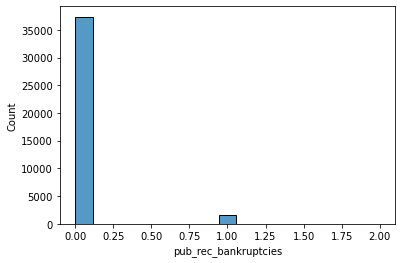

In [265]:
sns.histplot(LoanDf["pub_rec_bankruptcies"])

### Majority of the value is zero hence setting the missing value as zero will not impact the overall distribution

In [266]:
LoanDf.pub_rec_bankruptcies.fillna(0,inplace=True)

### Column 'tax_liens' has only value '0 & nan' hence we can drop this

In [267]:
LoanDf["tax_liens"].unique()

array([ 0., nan])

In [268]:
LoanDf.drop(["tax_liens"],axis=1,inplace=True)

## Final structure of DataFrame after cleaning

In [301]:
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  int64         
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                39717 non-null  object        
 11  emp_length               39717 non-null  object        
 12  home_ownership           39717 n

In [302]:
LoanDf.shape

(39717, 56)